<a href="https://colab.research.google.com/github/AndrewsJascoro/DataAnalyts_Mintic_Talento_Tech/blob/main/SQL_and_SQLite_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Made by Javier A. S. Coronado to Bootcamp Analisis de datos y visualizacion 1**
###**This is for the BootCamp analisis de datos y visualizacion 1 and share for everyone in anywhere place the world 🌎🌍🌏.**

#**⤵⬇⏬Este is mi link en GitHub. click in This is my link on GitHub**
💻▶ Click here:
**[SQL_and_SQLite_using_Python.ipynb](https://github.com/AndrewsJascoro/DataAnalyts_Mintic_Talento_Tech/blob/main/SQL_and_SQLite_using_Python.ipynb)**

##Motivation you guys!


*  **I'll use this script in notebook for you bootcampers of Data Analysis and
visualization of Mintic Colombia in February 2024, to provide introduction and practice to data analysis using this tools to work in SQL language and Python with libraries the just it for now we will used libraries with sqlite3 for SQL queries, Pandas, Polars, and NumPy for Data Manipulation, Plotly, Matplotlip, and Seaborn for Data Visualization, and Display is a extra for show different output,  you don't worries you can use just print().**


* **You can found out, more tools out there a big list of thoses tools using in data analysis like it for Database operations, Time series analysis, Statistical analysis, Web scraping, Natural language processing, Machine learning and more tools for Data manipulation and Data Visualization.**

* **I using in this notebook which are should be are must tool for every one in data analytics even though for data scientist will complement him and it is one of many ways to the possibilities of the to trail for getting access to data, but more interesting in this script notebook, there are simple tools to works and you found out the journey for go to road to advance level of the data analysis. The logic behind SQL is very similar to any other tool or language that used for data analysis and for those that used to work with data, should be very intuitive.**

---

1. We will create in down below cell, the connection to the DB, and see what tables we have.

***Some theory:***

**We using Python code with Pandas library and SQL queries.**


*   a.) Import enough libraries that you need, according to what you want to do, with your code or you mind to need to works fine. From the Python packages.  

*   b.) Is neccesary to defines the variable 'path' containing the location of the your SQLite database file.

*   c.) Concatenating 'path' with the name of the database file ('datbase.sqlite') to form the complete path to the database file.

*   d.) Creating a connection to the SQlite database is estaestablished using the 'connect()' function from the "sqlite3" module. The 'database' variable holdas the path to the SQLite database file.

*   e.) Just, We puted it a message of the success connection with print() or display() function.

*   f.) In a variable of tables name and inside that tuple, is the sql query block code to retrieve the names of all tables in the SQLite database, using function from the pandas library to execute the sql query and load the results into a pandas DataFrame named tables and variable conn.

*   g.) Displaying those table names. This contains the names of all tables in the SQLite database.

**You can download the database of the European professional football league by clicking on this link.**

[Link of the European Soccer Database ▶ Here](https://www.kaggle.com/datasets/hugomathien/soccer)


## The Connection test using SQLite and Python code was successful.

In [ ]:
# 1.
#Import of libraries
import pandas as pd # python library for data manipulation
import sqlite3 # SQLite
from IPython.display import display

# The input data.
path = "/content/database.sqlite"
database = path + 'database.sqlite'

# We create the connection with the DB and we will list the tables we have
conn = sqlite3.connect(database)
print ("We have a success connection😀")

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)

# Display the DataFrame
display(tables)

# Close the database connection
conn.close()

We have a success connection😀


,type,name,tbl_name,rootpage,sql


2.1. This query is to make a List of countries. Using standardized across different database management systems (DBMS) and are fundamental to writing and understanding SQL queries regardless of the specific database system being used.

The SQL have reserved words or keywords in the SQL language syntax and are used for example: The words "SELECT" and the "FROM" in this case is to construct and behavior of SQL queries for various operations task for this SQl block code.

**Down below to this cell.**

***Some theory of SQL:***

**Here, I creating a pandas DataFrame named countries using data fetched from a database cursor object.**

**1. cursor.description:**

This attribute of the cursor object contains metadata about the columns in the result set. It typically returns a sequence of tuples, where each tuple contains information about a single column, such as the column name, data type, and other properties.

**2. cursor.fetchall():**

This method retrieves all the remaining rows from the result set returned by the cursor's execution of a SQL query. It returns a list of tuples where each tuple represents a row of data retrieved from the database.

**3. [i[0] for i in cursor.description]
:**

This is a list comprehension that extracts the column names from the cursor.description attribute. It iterates over each tuple in cursor.description and retrieves the first element of each tuple, which corresponds to the column name. This generates a list of column names.

**4. columns=[i[0] for i in cursor.description]:**

 Here, the list of column names extracted from the cursor.description is provided as the columns argument for the DataFrame constructor. This ensures that the DataFrame countries will have appropriate column names.

 **5. pd.DataFrame(...):**

This is a constructor for creating a pandas DataFrame. It takes two main arguments: data and columns. data represents the data that will populate the DataFrame, and columns specifies the column names.

**6. countries:**

 Finally, the resulting DataFrame is assigned to the variable countries, which can then be used for further analysis or processing in the Python code.

 ***Note: This code fetches data from a database cursor, creates a pandas DataFrame with the fetched data, and assigns appropriate column names to the DataFrame based on the metadata retrieved from the cursor***

In [ ]:
# 2.
# 2 of 1
# Using a cursor
# Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt
from IPython.display import display

# Input data files.
# Connect to an SQLite database file.
conn = sqlite3.connect('/content/database.sqlite')

# Create a cursor object to execute SQL commands:
cursor = conn.cursor()

# Execute the SQL query to select all data from the 'Country' table:
cursor.execute('''Select * From Country; ''')

# Fetch all rows returned by the query into a DataFrame:
# countries = pd.DataFrame(cursor.fetchall(),
# columns=[i[0] for i in cursor.description])
countries = pd.DataFrame(cursor.fetchall(),
                         columns=[i[0] for i in cursor.description])

# Display the DataFrame
display(countries)

conn.commit()
conn.close()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


#### 2.2. We using countries variable.

In [ ]:
# 3.
# 2 of 2.
# Imports
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect('/content/database.sqlite')

# Read data from the 'Country' table directly into a DataFrame
countries = pd.read_sql_query("SELECT * FROM Country", conn)

# Display the DataFrame
display(countries)

# Close the connection
conn.close()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


#### 3. In one of these two blocks of code, we find out, how many soccer players play with the right-foot and how many soccer player play with the letf-foot. In the other block of code, how many soccer players play with left-foot, how many soccer players play with  right-foot,and how many player play without a confirmed preference answer.

In [ ]:
 # 4.
 # 3. One of three
 # Import the necessary libraries
import sqlite3

# Connect to the SQLite database file
conn = sqlite3.connect('/content/database.sqlite')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Execute a SQL query to count the occurrences of each preferred foot
cursor.execute("SELECT preferred_foot, COUNT(*) AS count FROM Player_Attributes GROUP BY preferred_foot")

# Fetch all rows returned by the query
results = cursor.fetchall()

# Display the results
for row in results:
    #display(f"{row[0]}-handed players: {row[1]}")
    print(f"{row[0]}-handed players: {row[1]}")

# Display the DataFrame
display(results)

# Close the connection
conn.close()

None-handed players: 836
left-handed players: 44733
right-handed players: 138409


[(None, 836), ('left', 44733), ('right', 138409)]

In [ ]:
# 5.
# Two of three.
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect('/content/database.sqlite')

# Read data from the 'Player_Attributes' table into a DataFrame
query = "SELECT preferred_foot FROM Player_Attributes"
player_data = pd.read_sql_query(query, conn)

# Count the occurrences of each preferred foot
foot_counts = player_data['preferred_foot'].value_counts()

# Display the results
for foot, count in foot_counts.items():
    print(f"{foot}-handed players: {count}", "\n")

# Display the DataFrame
display(foot_counts)

# Close the connection
conn.close()

right-handed players: 138409 

left-handed players: 44733 



right    138409
left      44733
Name: preferred_foot, dtype: int64

In [ ]:
# 6.
# Three of three
# Count the occurrences of each preferred foot, including missing values
foot_counts = player_data['preferred_foot'].value_counts(dropna=False)

# Display the DataFrame
display(foot_counts)

right    138409
left      44733
None        836
Name: preferred_foot, dtype: int64

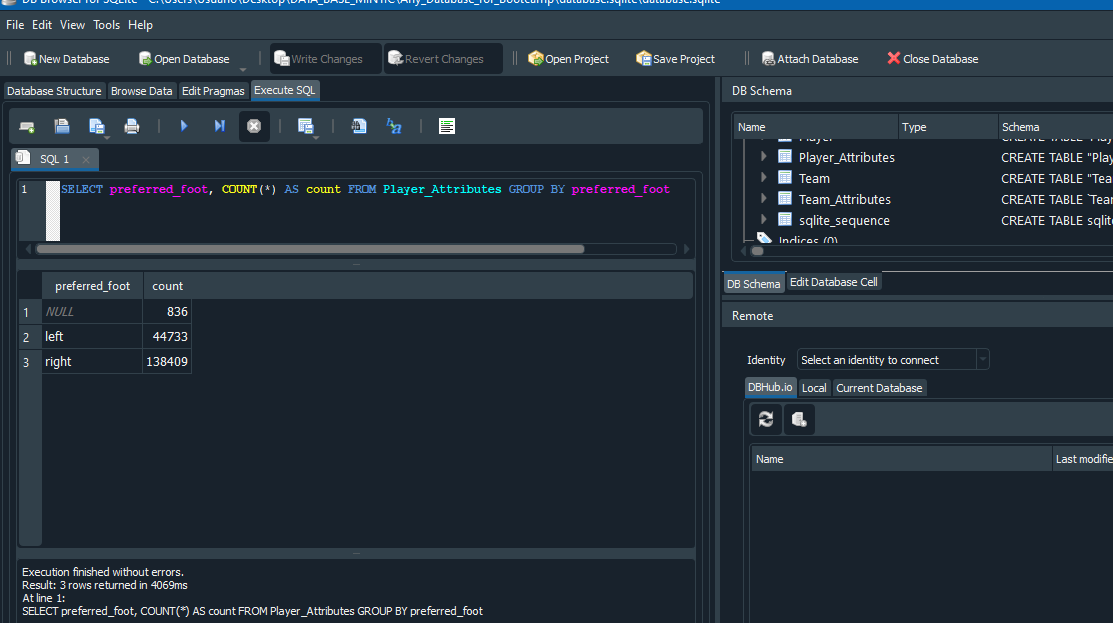

**4.  Queremos saber cual es el nombre del jugador de soccer que más interceptaciones tiene?**

---
**4.  We want to know the name of the soccer player who has the most interceptions?**
In two parts of code

In [ ]:
# 7.
# One of two.
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect("/content/database.sqlite")

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Execute the SQL query to find the distinct names of soccer players with the maximum interceptions
query = """
    SELECT DISTINCT p.player_name
    FROM Player p
    JOIN Player_Attributes pa ON p.player_api_id = pa.player_api_id
    WHERE pa.interceptions = (
        SELECT MAX(interceptions)
        FROM Player_Attributes
    )
    --LIMIT 5; """

cursor.execute(query)

# Fetch all rows returned by the query
results = cursor.fetchall()

# Display the results
print("Distinct names of soccer players with the maximum interceptions:")
for row in results:
    print(row[0])

# Close the connection
conn.close()

Distinct names of soccer players with the maximum interceptions:
Andrea Pirlo
Timmy Simons


In [ ]:
# 8.
# Two of two.
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect("/content/database.sqlite")

# Read data from the 'Player_Attributes' table into a DataFrame
query = """
    SELECT DISTINCT p.player_name
    FROM Player p
    JOIN Player_Attributes pa ON p.player_api_id = pa.player_api_id
    WHERE pa.interceptions = (
        SELECT MAX(interceptions)
        FROM Player_Attributes
    )
    LIMIT 5;
"""
player_data = pd.read_sql_query(query, conn)

# Display the results
print("Distinct names of soccer players with the maximum interceptions:")

# Display the DataFrame
display(player_data)

# Close the connection
conn.close()

Distinct names of soccer players with the maximum interceptions:


,player_name
0,Andrea Pirlo
1,Timmy Simons


###Esto es la salida en Jupyter lab o jupyter Notebook:

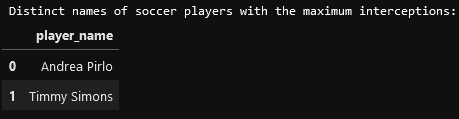






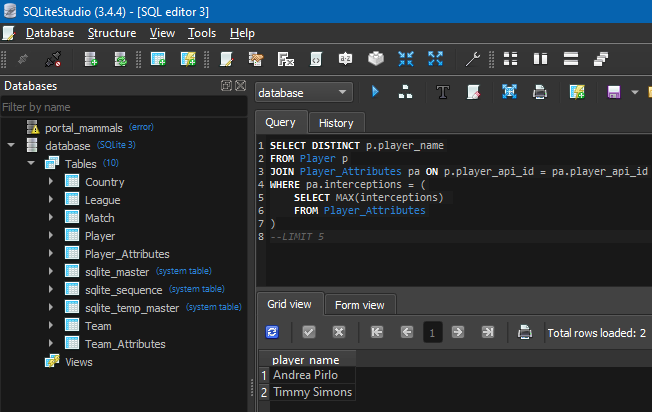

---
Second  picture:

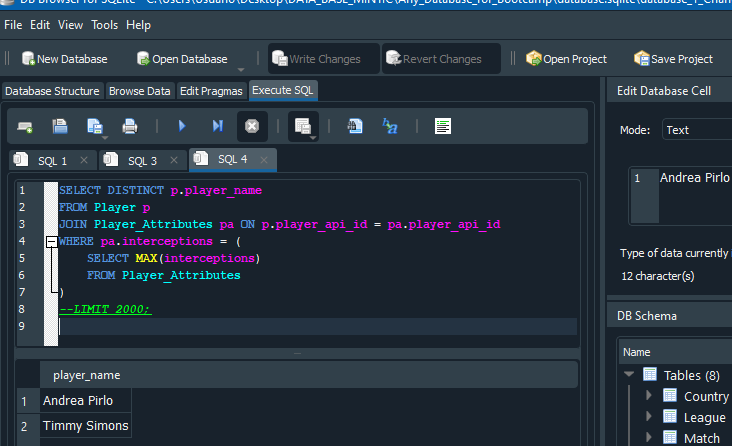


---
### ***Some theory:***

5. This is the join operation. It combines rows from the League table with rows from the Country table based on a related column. Here, it's joining based on the country_id column in the League table and the id column in the Country table. This means that for each row in the League table, it finds the corresponding row in the Country table where the id matches the country_id.

**The SELECT* all columns of the "League" and "Country" tables, FROM League this specifies the table from which data will be retrieved. In this case, it's the "League" table.
"JOIN Country ON Country.id = League.country_id" this clause performs a join operation between the "League" table and the "Country" table. It specifies that rows from both tables should be combined based on the condition "Country.id = League.contry_id"**

JOIN: This keyword specifies that the two tables (League and Country) should be joined together.

Country: This is the name of the table to be joined.

ON: This keyword specifies the condition for the join. It indicates that rows should be matched based on the following condition.

Country.id = League.country_id: This is the join condition. It specifies that rows from the Country table should be matched with rows from the League table where the id column in the Country table is equal to the country_id column in the League table.

Note: Overall, this query retrieves all columns from both the League and Country tables and combines rows from both tables where the country_id column in the League table matches the id column in the Country table.

In [ ]:
# 9.
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect("/content/database.sqlite")

# Do joins the columns of two tables.
leagues = pd.read_sql("""SELECT *
                        FROM League
                        JOIN Country ON Country.id = League.country_id;""", conn)

# Display the DataFrame
display(leagues)

# Close the database connection
conn.close()

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


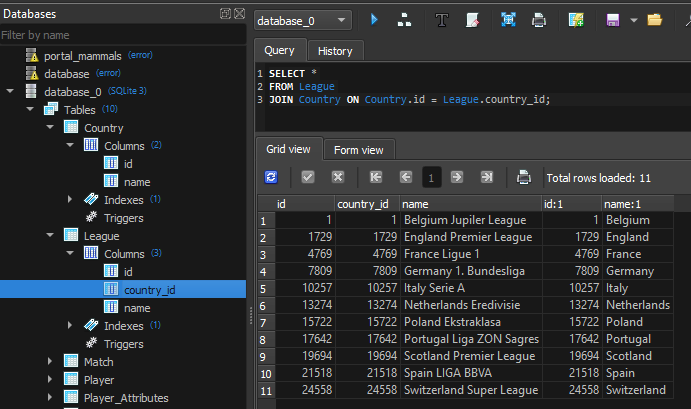

6. List of leagues and their country one to the other way to made.

Establishing League-Country Relationships.
Employing a LEFT JOIN, I will extract the names of leagues associated with each country, offering a deeper understanding of the dataset's structure.

  **"SELECT":** This clause specifies the columns to be included in the result set.

  **"country.name AS country_name":**
  
   This selects the name column from the Country table and aliases it as country_name.

  **"league.name AS league_name":**
  
  This selects the name column from the League table and aliases it as league_name.

  **"FROM League":** This specifies the primary table from which data will be retrieved, which is the League table.

  **"LEFT JOIN Country ON country.id = league.country_id":**
  
  This clause performs a left join operation between the League table and the Country table.

  **"LEFT JOIN":**
  
  This keyword specifies that all rows from the left table (League table) will be included in the result set, regardless of whether there is a match in the right table (Country table).

  **"Country":**
  
  This is the name of the table to be joined.

  **"ON country.id = league.country_id":**
  
  This is the join condition. It specifies that rows from the Country table should be matched with rows from the League table where the id column in the Country table matches the country_id column in the League table.

  **"ORDER BY country.name":**
  
  This clause orders the results by the name column of the Country table in ascending order.


In [ ]:
# 10.
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect("/content/database.sqlite")

# All records from the League table will be returned,
# along with matching records from the Country table. The join condition
# is specified as country.id = league.country_id, which means
# that it joins the records from the League table
# where the country_id column matches the id column in the Country table.
# ^^^The result set is ordered by the country.name column in ascending order.^^^
query = """SELECT
                country.name AS country_name,
                league.name AS league_name
            FROM League
            LEFT JOIN Country ON country.id = league.country_id
            ORDER BY country.name;  """

# Execute the query and read the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)
 # Display the countries query
display(df)
# Close the database connection
conn.close()

,country_name,league_name
0,Belgium,Belgium Jupiler League
1,England,England Premier League
2,France,France Ligue 1
3,Germany,Germany 1. Bundesliga
4,Italy,Italy Serie A
5,Netherlands,Netherlands Eredivisie
6,Poland,Poland Ekstraklasa
7,Portugal,Portugal Liga ZON Sagres
8,Scotland,Scotland Premier League
9,Spain,Spain LIGA BBVA


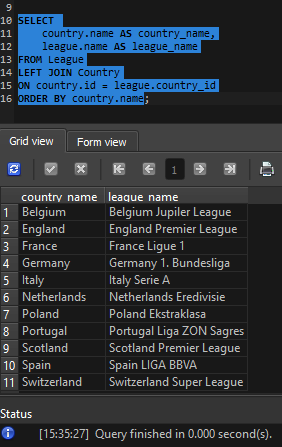

7. This SQL query retrives data from the 'Team' table, orders the results by the 'team_long_name' column, and limits the output to the first ten rows.

**"ORDER BY team_long_name"**: This clause sorts the result set in ascending order based on the values in the team_long_name column. Rows with the same team_long_name value will be ordered based on other columns' values, if any.

In [ ]:
# 11.
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect("/content/database.sqlite")

# Limit the search to ten or show only the top ten.
teams = pd.read_sql("""SELECT *
                        FROM Team
                        ORDER BY team_long_name
                        LIMIT 10;""", conn)

# Display the DataFrame teams
display(teams)

# Close the database connection
conn.close()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


8. Example:
With this query we made a list of matches.

Con este query hicimos una lista de coincidencias.

1.  This SQL query retrieves data from the Match table along with some additional information about countries, leagues, and teams.

2. "Match.id": The unique identifier for each match.

3. "Country.name AS country_name": The name of the country where the match was played, aliased as country_name.

4. "League.name AS league_name": The name of the league where the match was played, aliased as league_name.

5. "season": The season of the match.

6. "stage": The stage of the league.

7. "date": The date of the match.

8. "HT.team_long_name AS home_team": The long name of the home team, aliased as home_team.

9. "AT.team_long_name AS away_team": The long name of the away team, aliased as away_team.

10. "home_team_goal": The number of goals scored by the home team.

11. "away_team_goal": The number of goals scored by the away team.   

12. "FROM Match": This specifies the primary table from which data will be retrieved, which is the Match table.

13. "JOIN": This keyword is used to combine rows from two or more tables based on a related column between them.

14. "JOIN Country ON Country.id = Match.country_id": This joins the Match table with the Country table based on the id column in the Country table matching the country_id column in the Match table.

15. "JOIN League ON League.id = Match.league_id": This joins the Match table with the League table based on the id column in the League table matching the league_id column in the Match table.

16. "LEFT JOIN": This keyword performs a left join operation, which returns all rows from the left table (Match table), and the matched rows from the right table (Team table), with NULL values in the columns from the right table if there is no match.

17. "LEFT JOIN Team AS HT ON HT.team_api_id = Match.home_team_api_id": This left joins the Team table (aliased as HT) with the Match table based on the team_api_id column in the Team table matching the home_team_api_id column in the Match table.

18. "LEFT JOIN Team AS AT ON AT.team_api_id = Match.away_team_api_id": This left joins the Team table (aliased as AT) with the Match table based on the team_api_id column in the Team table matching the away_team_api_id column in the Match table.

19. "WHERE country_name = 'Spain'": This clause filters the results to include only matches where the country name is 'Spain'.

20. "ORDER BY date": This clause orders the results by the date column in ascending order.

21. "LIMIT 10": This clause limits the number of rows returned by the query to 10.

*Note:* this query retrieves data about matches played in Spain, including information about the country, league, season, stage, date, home team, away team, and the number of goals scored by each team. It also limits the output to the first 10 matches, ordered by date.




In [ ]:
# 12.
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect("/content/database.sqlite")

# Query is explained in the previous text cell.⬆⤴⏫ read up there.
detailed_matches = pd.read_sql(
    """
    SELECT
        Match.id,
        Country.name AS country_name,
        League.name AS league_name,
        season, stage, date,
        HT.team_long_name AS home_team,
        AT.team_long_name AS away_team,
        home_team_goal,
        away_team_goal
    FROM
        Match
    JOIN
        Country ON Country.id = Match.country_id
    JOIN
        League ON League.id = Match.league_id
    LEFT JOIN
        Team AS HT ON HT.team_api_id = Match.home_team_api_id
    LEFT JOIN
        Team AS AT ON AT.team_api_id = Match.away_team_api_id
    WHERE
        country_name = 'Spain'
    ORDER BY
        date
    LIMIT
        10;
    """, conn)

# Display the DataFrame
display(detailed_matches)

# Close the database connection
conn.close()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


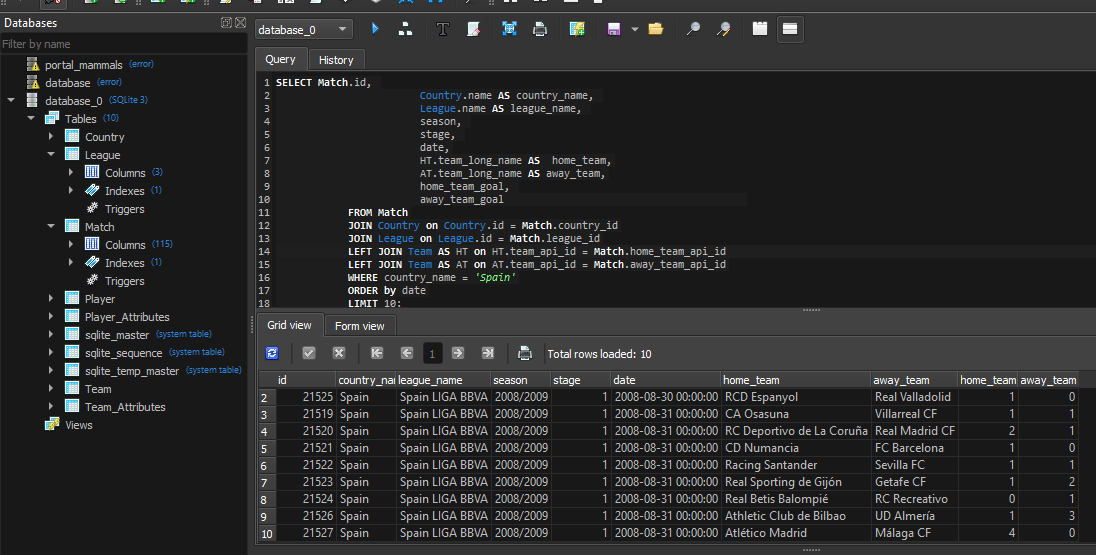

## This is the beginning of the paratices of Data Analyisis using SQL (Español).

**2.1.2 List the European football leagues.**

In [ ]:
# 13.
# 2.1.2 of 1 - 3
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect("/content/database.sqlite")

# Execute the query to show the list of the Country and league
countries = pd.read_sql("""
SELECT
    country.name AS country_name,
    league.name AS league_name

FROM League
LEFT JOIN Country
ON country.id = league.country_id;""", conn)
#--ORDER BY country.name

# Display the DataFrame
display(countries)

# Close the database connection
conn.close()

,country_name,league_name
0,Belgium,Belgium Jupiler League
1,England,England Premier League
2,France,France Ligue 1
3,Germany,Germany 1. Bundesliga
4,Italy,Italy Serie A
5,Netherlands,Netherlands Eredivisie
6,Poland,Poland Ekstraklasa
7,Portugal,Portugal Liga ZON Sagres
8,Scotland,Scotland Premier League
9,Spain,Spain LIGA BBVA


In [ ]:
# 14.
# 2.1.2 of 2 - 3.
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect("/content/database.sqlite")

# Execute the query to show country and league
countries = pd.read_sql("""
SELECT c.name AS Country, l.name AS League
FROM Country c, League L
WHERE c.id = l.country_id;""", conn)
#--ORDER BY country.name

# Display the DataFrame
display(countries)

# Close the database connection
conn.close()

,Country,League
0,Belgium,Belgium Jupiler League
1,England,England Premier League
2,France,France Ligue 1
3,Germany,Germany 1. Bundesliga
4,Italy,Italy Serie A
5,Netherlands,Netherlands Eredivisie
6,Poland,Poland Ekstraklasa
7,Portugal,Portugal Liga ZON Sagres
8,Scotland,Scotland Premier League
9,Spain,Spain LIGA BBVA


In [ ]:
# 15.
# 2.1.2 of 3 - 3
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect("/content/database.sqlite")

# Execute the query to show country and league
countries = pd.read_sql("""
SELECT country.name AS country_name, league.name AS league_name
FROM League
JOIN Country ON country.id = league.country_id;""", conn)
#--ORDER BY country.name

# Display the DataFrame
display(countries)

# Close the database connection
conn.close()

,country_name,league_name
0,Belgium,Belgium Jupiler League
1,England,England Premier League
2,France,France Ligue 1
3,Germany,Germany 1. Bundesliga
4,Italy,Italy Serie A
5,Netherlands,Netherlands Eredivisie
6,Poland,Poland Ekstraklasa
7,Portugal,Portugal Liga ZON Sagres
8,Scotland,Scotland Premier League
9,Spain,Spain LIGA BBVA


2.1.3 Practice: List the European football players.

In [ ]:
# 16.
# 2.1.3 of 1 - 3
# Using SQLite3:
# List European football players.

import sqlite3
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Create a cursor object
cursor = conn.cursor()

# Execute the query to select European football players from the "Player" table
cursor.execute("""
    SELECT player_name, birthday, height, weight
    FROM Player
    ORDER BY player_name
    LIMIT 10 ; """)
# Fetch all rows
rows = cursor.fetchall()

# Output data
for row in rows:
  display(row) # Display the row

# Close the connection
conn.close()

('Aaron Appindangoye', '1992-02-29 00:00:00', 182.88, 187)

('Aaron Cresswell', '1989-12-15 00:00:00', 170.18, 146)

('Aaron Doran', '1991-05-13 00:00:00', 170.18, 163)

('Aaron Galindo', '1982-05-08 00:00:00', 182.88, 198)

('Aaron Hughes', '1979-11-08 00:00:00', 182.88, 154)

('Aaron Hunt', '1986-09-04 00:00:00', 182.88, 161)

('Aaron Kuhl', '1996-01-30 00:00:00', 172.72, 146)

('Aaron Lennon', '1987-04-16 00:00:00', 165.1, 139)

('Aaron Lennox', '1993-02-19 00:00:00', 190.5, 181)

('Aaron Meijers', '1987-10-28 00:00:00', 175.26, 170)

In [ ]:
# 17.
# 2.1.2 of 2 - 3.
# Using Python pandas:
# List European football players.

import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Query to select all football players from the "Player" table
players = """
    SELECT player_name, birthday, height, weight
    FROM Player
    ORDER BY player_name
    LIMIT 10 ; """
# Read the query result into a pandas DataFrame
df = pd.read_sql_query(players, conn)

# Display the DataFrame
display(df)

# Close the connection
conn.close()

,player_name,birthday,height,weight
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
2,Aaron Doran,1991-05-13 00:00:00,170.18,163
3,Aaron Galindo,1982-05-08 00:00:00,182.88,198
4,Aaron Hughes,1979-11-08 00:00:00,182.88,154
5,Aaron Hunt,1986-09-04 00:00:00,182.88,161
6,Aaron Kuhl,1996-01-30 00:00:00,172.72,146
7,Aaron Lennon,1987-04-16 00:00:00,165.10,139
8,Aaron Lennox,1993-02-19 00:00:00,190.50,181
9,Aaron Meijers,1987-10-28 00:00:00,175.26,170


In [ ]:
!pip install polars


In [ ]:
# 18
# 2.1.2 of 3 - 3
# 10-2. Using Python polars:
# List European football players.
import polars as pl
import sqlite3
from IPython.display import display

# Read the SQLite database into a Polars DataFrame
db_path = "/content/database.sqlite"
conn = sqlite3.connect(db_path)
query = """
      SELECT player_name, birthday, height, weight
      FROM Player
      ORDER BY player_name
      LIMIT 10; """
cursor = conn.execute(query)
data = cursor.fetchall()
conn.close()
df = pl.DataFrame(data)
schema_df = pl.DataFrame(df.schema)
display(df)

column_0,column_1,column_2,column_3
str,str,f64,i64
"""Aaron Appindan…","""1992-02-29 00:…",182.88,187
"""Aaron Cresswel…","""1989-12-15 00:…",170.18,146
"""Aaron Doran""","""1991-05-13 00:…",170.18,163
"""Aaron Galindo""","""1982-05-08 00:…",182.88,198
"""Aaron Hughes""","""1979-11-08 00:…",182.88,154
"""Aaron Hunt""","""1986-09-04 00:…",182.88,161
"""Aaron Kuhl""","""1996-01-30 00:…",172.72,146
"""Aaron Lennon""","""1987-04-16 00:…",165.1,139
"""Aaron Lennox""","""1993-02-19 00:…",190.5,181


In [ ]:
# 19.
# List of teams
'''ORDER BY defines the sorting of the output -
ascending or descending (DESC)
LIMIT, limits the number of rows in the output -
after the sorting'''
# 11-1. Using Python pandas:
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Query to select all football players from the "Player" table
teams = """
    SELECT *
    FROM Team
    ORDER BY team_long_name
    LIMIT 10;
"""
# Read the query result into a pandas DataFrame
df = pd.read_sql_query(teams, conn)

# Print the data or Display the DataFrame
display(df)

# Close the connection
conn.close()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


2.2.1 Example: List the seasons played from this Database.

In [ ]:
# 2.2.1
# 20.
# List the seasons played from this Database.
import pandas as pd
import sqlite3
from IPython.display import display

# Connect to the SQLite database file
conn = sqlite3.connect("/content/database.sqlite")

# Execute the query to show seasons.
seasons = pd.read_sql("""
                      SELECT DISTINCT season
                      FROM Match;""", conn)

# Display the DataFrame
display(seasons)

# Close the connection
conn.close()

,season
0,2008/2009
1,2009/2010
2,2010/2011
3,2011/2012
4,2012/2013
5,2013/2014
6,2014/2015
7,2015/2016


2.2.2 Practice: List only different rates of overall player ratings.

In [ ]:
# 21.
# 2.2.2.
# List of only different general rating rates for
# the European football players.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Query to select distinct overall player ratings from the "Player_Attributes" table
OverallRating = """
    SELECT DISTINCT overall_rating
    FROM Player_Attributes
    ORDER BY overall_rating DESC;
"""
# Read the query result into a pandas DataFrame
df = pd.read_sql_query(OverallRating, conn)

# Print the distinct overall player ratings
display(df)

# Close the connection
conn.close()

,overall_rating
0,94.0
1,93.0
2,92.0
3,91.0
4,90.0
...,...
57,37.0
58,36.0
59,35.0
60,33.0


**14. List of the different general rating rates of soccer players with their names, for the top fifteenth soccer players in the European professional soccer league.**

Note: This my idea  of question about European football.

In [ ]:
# 22.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Query to select distinct overall player ratings from the "Player_Attributes" table
OverallRating = """SELECT p.id, p.player_api_id, p.player_name, overall_rating,
ROUND(AVG(pl.overall_rating),3) AS Rating
FROM  Player p, Player_Attributes pl
WHERE p.player_api_id = pl.player_api_id
GROUP BY p.id, p.player_api_id
ORDER BY 4 DESC, overall_rating DESC
LIMIT 15;"""

# Read the query result into a pandas DataFrame
df = pd.read_sql_query(OverallRating, conn)

# Print the distinct overall player ratings
display(df)

# Close the connection
conn.close()

,id,player_api_id,player_name,overall_rating,Rating
0,6176,30981,Lionel Messi,94,92.192
1,1995,30893,Cristiano Ronaldo,93,91.280
2,7867,19533,Neymar,90,83.800
3,6556,27299,Manuel Neuer,90,85.862
4,6377,40636,Luis Suarez,90,85.275
5,11057,35724,Zlatan Ibrahimovic,89,88.286
6,951,30834,Arjen Robben,89,87.840
7,10188,80562,Thiago Silva,88,83.917
8,9674,37412,Sergio Aguero,88,86.114
9,9039,93447,Robert Lewandowski,88,82.875


3.1.2 Practice: List 25 European football teams.

In [ ]:
# 23. # 3.1.2
# The twenty-five teams of the European football league.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Query to select twenty-five teams from the European
# professional soccer league.
teams = """
    SELECT id, team_api_id, team_fifa_api_id, team_long_name
    FROM Team
    LIMIT 25;
"""
# Read the query result into a pandas DataFrame
df = pd.read_sql_query(teams, conn)

# Print the DataFrame
display("The twenty-five teams of the European football league.", df)

# Close the connection
conn.close()

'The twenty-five teams of the European football league.'

,id,team_api_id,team_fifa_api_id,team_long_name
0,1,9987,673.0,KRC Genk
1,2,9993,675.0,Beerschot AC
2,3,10000,15005.0,SV Zulte-Waregem
3,4,9994,2007.0,Sporting Lokeren
4,5,9984,1750.0,KSV Cercle Brugge
5,6,8635,229.0,RSC Anderlecht
6,7,9991,674.0,KAA Gent
7,8,9998,1747.0,RAEC Mons
8,9,7947,NaN,FCV Dender EH
9,10,9985,232.0,Standard de Liège


4.1.2 Practice: Bring the number of stages played from the Match table.

In [ ]:
# 24.
# Or 4.1.2
# Find out the number of stages.
# The results table should
# show only the number, with the number of different stages.
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Query to count the number of
# different stages in the 'stage' column of the 'Match' table
stages = """
          SELECT COUNT(DISTINCT stage) AS Num_Stages
          FROM Match;
"""
# Read the query result into a pandas DataFrame
df = pd.read_sql_query(stages, conn)

# Print the number of different stages
print("Number of different stages:", df["Num_Stages"].iloc[0])

# Close the connection
conn.close()

Number of different stages: 38


17. or (4.1.3). Make the sum of goals scored by visiting teams in the professional European soccer league.

4.1.3 Practice: Bring the sum of goals scored by the visiting teams from the Match table.

In [ ]:
# 25.
# 1 - 3
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")  # /content/database.sqlite

# Create a cursor object
cursor = conn.cursor()

# Execute the query
cursor.execute("SELECT SUM(away_team_goal) AS Total_Away_Goals FROM Match;")

# Fetch the result
total_away_goals = cursor.fetchone()[0]

# Print the total number of away goals
print("Total number of away goals scored:", total_away_goals)

# Close the connection
conn.close()

Total number of away goals scored: 30160


In [ ]:
# 26.
# 2 - 3
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Query to calculate the sum of goals scored by visiting teams
away_goals = """
    SELECT SUM(away_team_goal) AS Total_Away_Goals
    FROM Match;"""
# Execute the query
cursor = conn.cursor()
cursor.execute(away_goals)

# Fetch the result
total_away_goals = cursor.fetchone()[0]

# Print the sum of goals scored by visiting teams
print("Total goals scored by visiting teams:", total_away_goals)

# Close the connection
conn.close()

Total goals scored by visiting teams: 30160


In [ ]:
# 27.
# 3 - 3
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Read the Match table into a pandas DataFrame
df = pd.read_sql_query("SELECT away_team_goal FROM Match", conn)

# Calculate the sum of goals scored by visiting teams
total_away_goals = df['away_team_goal'].sum()

# Print the sum of goals scored by visiting teams
print("Total goals scored by visiting teams:", total_away_goals)

# Close the connection
conn.close()

Total goals scored by visiting teams: 30160


 18.1 (4.1.4).

 Make the average of goals scored by home teams and make the average of goals scored by visiting teams.

 4.1.4 Practice: Bring the average of goals scored by the local teams and the average of goals scored by the visitors from the Match table.

In [ ]:
# 28.
# (4.1.4). 1 - 2.
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Define the SQL query to calculate the average goals scored by home teams
home_teams = """
    SELECT AVG(home_team_goal) AS Average_Home_Goals
    FROM Match;"""
# Execute the home_query and fetch the result
home_result = conn.execute(home_teams).fetchone()

# Define the SQL query to calculate the average goals scored by away teams
away_teams = """
    SELECT AVG(away_team_goal) AS Average_Away_Goals
    FROM Match;"""
# Execute the away_query and fetch the result
away_result = conn.execute(away_teams).fetchone()

# Print the average goals scored by home teams and away teams
print("Average goals scored by home teams:", home_result[0])
print("Average goals scored by away teams:", away_result[0])

# Close the connection
conn.close()

Average goals scored by home teams: 1.5445937103044767
Average goals scored by away teams: 1.1609376804341969


In [ ]:
# 29.
# (4.1.4). 2 - 2
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Read the "Match" table into a pandas DataFrame
df = pd.read_sql_query("SELECT home_team_goal, away_team_goal FROM Match;", conn)

# Calculate the average goals scored by home teams and away teams using pandas
average_home_goals = df["home_team_goal"].mean()
average_away_goals = df["away_team_goal"].mean()

# Print the average goals scored by home teams and away teams
print("Average goals scored by home teams:", average_home_goals)
print("Average goals scored by away teams:", average_away_goals)

# Close the connection
conn.close()

Average goals scored by home teams: 1.5445937103044767
Average goals scored by away teams: 1.1609376804341969


4.1.5 Practice: Bring the maximum number of goals that a visiting team scored in the Match table games.

In [ ]:
# 30.
# 4.1.5.
# 1 - 2
# Find the maximum number of goals
# of the visiting team and the home team.
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Define the SQL query to find the maximum number of goals scored by the home team
home_max_query = """
    SELECT MAX(home_team_goal) AS Max_Home_Goals
    FROM Match;"""
# Execute the home_max_query and fetch the result
home_max_result = conn.execute(home_max_query).fetchone()

# Define the SQL query to find the maximum number of goals scored by the away team
away_max_query = """
    SELECT MAX(away_team_goal) AS Max_Away_Goals
    FROM Match;"""
# Execute the away_max_query and fetch the result
away_max_result = conn.execute(away_max_query).fetchone()

# Print the maximum number of goals scored by the home team and the away team
print("Maximum number of goals scored by home team:", home_max_result[0])
print("Maximum number of goals scored by away team:", away_max_result[0])

# Close the connection
conn.close()

Maximum number of goals scored by home team: 10
Maximum number of goals scored by away team: 9


In [ ]:
# 31.
# 4.1.5.
# 2 - 2
# using pandas, sqlite3.
# Find the maximum number of goals
# of the visiting team and the home team.
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Read the "Match" table into a pandas DataFrame
df = pd.read_sql_query("SELECT home_team_goal, away_team_goal FROM Match;", conn)

# Find the maximum number of goals scored by the home team and the away team using pandas
max_home_goals = df["home_team_goal"].max()
max_away_goals = df["away_team_goal"].max()

# Print the maximum number of goals scored by the home team and the away team
print("Maximum number of goals scored by home team:", max_home_goals)
print("Maximum number of goals scored by away team:", max_away_goals)

# Close the connection
conn.close()

Maximum number of goals scored by home team: 10
Maximum number of goals scored by away team: 9


5.1.1. Find the average of the sum of goals scored by the home teams, and find the average of the sum of the goals scored by the away teams.

In [ ]:
# 32. 1-2
# 5.1.1.
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Define the SQL query to calculate the sum of goals scored by home teams
home_sum_query = """
    SELECT SUM(home_team_goal) AS Total_Home_Goals
    FROM Match;  """
# Execute the home_sum_query and fetch the result
home_sum_result = conn.execute(home_sum_query).fetchone()

# Define the SQL query to calculate the sum of goals scored by away teams
away_sum_query = """
    SELECT SUM(away_team_goal) AS Total_Away_Goals
    FROM Match;  """

# Execute the away_sum_query and fetch the result
away_sum_result = conn.execute(away_sum_query).fetchone()

# Calculate the average of the sum of goals scored by home teams and away teams
average_home_goals = home_sum_result[0] / conn.execute("SELECT COUNT(*) FROM Match;").fetchone()[0]
average_away_goals = away_sum_result[0] / conn.execute("SELECT COUNT(*) FROM Match;").fetchone()[0]

# Print the average of the sum of goals scored by home teams and away teams
print("Average of sum of goals scored by home teams:", average_home_goals)
print("Average of sum of goals scored by away teams:", average_away_goals)

# Close the connection
conn.close()

Average of sum of goals scored by home teams: 1.5445937103044767
Average of sum of goals scored by away teams: 1.1609376804341969


In [ ]:
# 33. 2-2 Code more Shorter.
# 5.1.1.
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Read the "Match" table into a pandas DataFrame
df = pd.read_sql_query("SELECT home_team_goal, away_team_goal FROM Match;", conn)

# Calculate the sum of goals scored by home teams and away teams
total_home_goals = df["home_team_goal"].sum()
total_away_goals = df["away_team_goal"].sum()

# Calculate the average of the sum of goals scored by home teams and away teams
num_matches = len(df)
average_home_goals = total_home_goals / num_matches
average_away_goals = total_away_goals / num_matches

# Print the average of the sum of goals scored by home teams and away teams
print("Average of sum of goals scored by home teams:", average_home_goals)
print("Average of sum of goals scored by away teams:", average_away_goals)

# Close the connection
conn.close()

Average of sum of goals scored by home teams: 1.5445937103044767
Average of sum of goals scored by away teams: 1.1609376804341969


6.2.2.Find the seasons in which a visiting team scored 7 or more goals.

In [ ]:
# 34.
# 6.2.2.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Query to select the seasons in which a visiting team has scored 7 or more goals
query = """
        SELECT season, home_team_goal, away_team_goal
        FROM Match
        WHERE away_team_goal >= 6;"""

# Read the query result into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,season,home_team_goal,away_team_goal
0,2008/2009,0,6
1,2012/2013,2,6
2,2012/2013,1,7
3,2012/2013,2,6
4,2012/2013,2,6
...,...,...,...
74,2008/2009,1,7
75,2009/2010,1,7
76,2014/2015,2,6
77,2015/2016,0,6


6.3.1. Find the Id of the teams that develop normal dribbling and their game speed is balanced.

In [ ]:
# 35.
# 6.3.1
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Query to select the 'Id' of the teams with normal dribbling and balanced game speed
query = """ SELECT id, buildUpPlayDribblingClass, buildUpPlaySpeedClass
            FROM Team_Attributes
            WHERE buildUpPlayDribblingClass = 'Normal'
            AND buildUpPlaySpeedClass = 'Balanced'; """

# DataFrame df
df = pd.read_sql_query(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,id,buildUpPlayDribblingClass,buildUpPlaySpeedClass
0,2,Normal,Balanced
1,3,Normal,Balanced
2,8,Normal,Balanced
3,9,Normal,Balanced
4,14,Normal,Balanced
...,...,...,...
382,1450,Normal,Balanced
383,1451,Normal,Balanced
384,1452,Normal,Balanced
385,1457,Normal,Balanced


6.3.2. With the Id of the teams that develop a long passing game or their game speed is fast.

In [ ]:
# 36. 1-2.
# 6.3.2.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Query to select the 'id' of the teams with the specified attributes
query = """ SELECT id, buildUpPlayPassingClass, buildUpPlaySpeedClass
            FROM Team_Attributes
            WHERE buildUpPlayPassingClass = 'Long'
            AND buildUpPlaySpeedClass = 'Fast'; """

# Read the query result into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,id,buildUpPlayPassingClass,buildUpPlaySpeedClass
0,4,Long,Fast
1,90,Long,Fast
2,167,Long,Fast
3,179,Long,Fast
4,183,Long,Fast
5,225,Long,Fast
6,289,Long,Fast
7,336,Long,Fast
8,359,Long,Fast
9,419,Long,Fast


6.3.3. How to bring the table of countries without the country Belgium?

In [ ]:
# 37
# 6.3.3.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Query to select id and name from Country table excluding Belgium
No_BELG = """SELECT id, name
             FROM Country
             WHERE name != 'Belgium'; """
# Read the query result into a pandas DataFrame
df = pd.read_sql_query(No_BELG, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,id,name
0,1729,England
1,4769,France
2,7809,Germany
3,10257,Italy
4,13274,Netherlands
5,15722,Poland
6,17642,Portugal
7,19694,Scotland
8,21518,Spain
9,24558,Switzerland


6.4.1. Bring the table of countries only with Italy¶

In [ ]:
# 38
# 6.4.1
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Execute the query to show only one country
No_Italy = """  SELECT id, name
                FROM Country
                WHERE name = 'Italy';"""

df = pd.read_sql_query(No_Italy, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,id,name
0,10257,Italy


6.4.2. Bring the table of countries without Poland
You can not use the (!) to exclude the country Poland.

In [ ]:
# 39.
# 6.4.2.
# 1 - 3
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Query to select id and name from Country table excluding Poland
query = """
    SELECT id, name
    FROM Country
    WHERE name <> 'Poland'; """

# Read the query result into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,17642,Portugal
7,19694,Scotland
8,21518,Spain
9,24558,Switzerland


In [ ]:
# 40
# 6.4.2.
# 2 - 3
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Query to select id and name from Country table excluding Poland
query = """ SELECT id, name
            FROM Country
            WHERE name != 'Poland'; """
# Read the query result into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,17642,Portugal
7,19694,Scotland
8,21518,Spain
9,24558,Switzerland


In [ ]:
# 41.
# 6.4.2.
# 3 - 3
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Query to select id and name from Country table excluding Poland

query = """
    SELECT id, name
    FROM Country
    WHERE name NOT LIKE 'Poland';
"""
# Read the query result into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,17642,Portugal
7,19694,Scotland
8,21518,Spain
9,24558,Switzerland


6.4.3 List players who weigh between 174 and 176 pounds.

In [ ]:
# 42.
# 6.4.3.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Query to select id and name from Country
query = ''' SELECT id, player_name, birthday, height, weight
            FROM Player
            WHERE weight BETWEEN 174 AND 176
            LIMIT 30;'''

# Read the query result into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,id,player_name,birthday,height,weight
0,17,Aaron Taylor-Sinclair,1991-04-08 00:00:00,182.88,176
1,34,Abdou Traore,1988-01-17 00:00:00,180.34,174
2,39,Abdoulaye Ba,1991-01-01 00:00:00,198.12,174
3,43,Abdoulaye Diallo,1992-03-30 00:00:00,187.96,174
4,61,Abel Aguilar,1985-01-06 00:00:00,185.42,176
5,68,Abella Perez Damia,1982-04-15 00:00:00,187.96,174
6,74,Abraham Gonzalez,1985-07-16 00:00:00,177.80,176
7,79,Achille Coser,1982-07-14 00:00:00,185.42,174
8,89,Adam Banas,1982-12-25 00:00:00,185.42,174
9,90,Adam Bodzek,1985-09-07 00:00:00,182.88,174


6.4.4 Practice: List the Messis from the player database.

In [ ]:
# 43
# 6.4.4.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Execute the query to show a data list of only one player.
query = '''SELECT id, player_name, birthday, height, weight
FROM Player
WHERE player_name LIKE '%Messi%'; '''

# Read the query result into a pandas DataFrame
df = pd.read_sql(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,id,player_name,birthday,height,weight
0,6176,Lionel Messi,1987-06-24 00:00:00,170.18,159


7.1.2 List the table of countries in descending order.


In [ ]:
# 44.
# 7.1.2
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")
query = '''SELECT id, name
            FROM Country
            ORDER BY name DESC;'''

# Read the query result into a pandas DataFrame
df = pd.read_sql(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,id,name
0,24558,Switzerland
1,21518,Spain
2,19694,Scotland
3,17642,Portugal
4,15722,Poland
5,13274,Netherlands
6,10257,Italy
7,7809,Germany
8,4769,France
9,1729,England


7.1.3 Practice: List the id of the 25 players with the least weight.

With the "Player" table in the ascending ASC form by the 'weight' column. The result will have the columns 'id', 'player_name' and 'weight'.


In [ ]:
# 45
# 7.1.3.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# query to select the 'id', 'player_name', and 'weight' columns from
# the "Player" table, order the result by the 'weight' column in ascending
# order, and limit the result to 25 records.
query = '''SELECT id, player_name, weight
FROM Player
ORDER BY weight ASC
LIMIT 25; '''

# Read the query result into a pandas DataFrame
df = pd.read_sql(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,id,player_name,weight
0,5453,Juan Quero,117
1,6853,Mariusz Rybicki,121
2,10954,Yohandry Orozco,121
3,1480,Caetano,123
4,2612,Diego Buonanotte,123
5,317,Aldo Kalulu,126
6,655,Andre Horta,126
7,3446,Fouad Rachid,126
8,7258,Maxi Moralez,126
9,7264,Maxime Blanc,126


7.1.4 Practice: List the id of the 15 players with the greatest height.


In [ ]:
# 46
# 7.1.4.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# query to select the 'id', 'player_name', and 'height' columns from
# the "Player" table and order the result by the 'height' column in
# descending order:
query = ''' SELECT id, player_name, height
            FROM Player
            ORDER BY height DESC
            LIMIT 15;'''
# Read the query result into a pandas DataFrame
df = pd.read_sql(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,id,player_name,height
0,5908,Kristof van Hout,208.28
1,1301,Bogdan Milic,203.20
2,1926,Costel Pantilimon,203.20
3,3274,Fejsal Mulic,203.20
4,5568,Jurgen Wevers,203.20
5,5804,Kevin Vink,203.20
6,5957,Lacina Traore,203.20
7,8016,Nikola Zigic,203.20
8,8285,Paolo Acerbis,203.20
9,8638,Pietro Marino,203.20


7.1.5 Practice: List the ID of the 10 tallest players and order them alphabetically but in descending order.

In [ ]:
# 47
# 7.1.5.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# SQL query to select the 'id', 'player_name', and 'height' columns
# from the "Player" table, order the result by the 'height' column
# in descending order, and then by the 'player_name' column in descending
# order. Additionally, it limits the result to the top 10 tallest players:
query = ''' SELECT id, player_name, height
            FROM Player
            ORDER BY height DESC, player_name DESC
            LIMIT 10; '''

# Read the query result into a pandas DataFrame
df = pd.read_sql(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,id,player_name,height
0,5908,Kristof van Hout,208.28
1,11043,Zeljko Kalac,203.20
2,10574,Vanja Milinkovic-Savic,203.20
3,9916,Stefan Maierhofer,203.20
4,8638,Pietro Marino,203.20
5,8285,Paolo Acerbis,203.20
6,8016,Nikola Zigic,203.20
7,5957,Lacina Traore,203.20
8,5804,Kevin Vink,203.20
9,5568,Jurgen Wevers,203.20


8.1.2 Practice: We want to know how many teams have each type of defensive play.
How many have class "defencePressureClass = 'Medium', defensePressureClass = 'Deep' and defensePressureClass = 'High'.? of these columns.

In [ ]:
# 48
# 8.2.1.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# how many of them have different values for the 'defencePressureClass'column
DefePresClass = ''' SELECT
    COUNT(*) AS total_teams,
    SUM(CASE WHEN defenceDefenderLineClass IS NOT NULL THEN 1 ELSE 0 END) AS total_defensive_teams,
    SUM(CASE WHEN defencePressureClass = 'Medium' THEN 1 ELSE 0 END) AS total_medium_pressure_teams,
    SUM(CASE WHEN defencePressureClass = 'Deep' THEN 1 ELSE 0 END) AS total_deep_pressure_teams,
    SUM(CASE WHEN defencePressureClass = 'High' THEN 1 ELSE 0 END) AS total_high_pressure_teams
    FROM Team_Attributes;'''

# Read the query result into a pandas DataFrame
df = pd.read_sql(DefePresClass, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,total_teams,total_defensive_teams,total_medium_pressure_teams,total_deep_pressure_teams,total_high_pressure_teams
0,1458,1458,1243,154,61


 Code: Explained.
  
total_teams counts the total number of teams in the "Team_Attributes" table.
total_defensive_teams counts the number of teams that have a defensive game class (i.e., where the 'defenseDefenderLineClass' column is not NULL).
total_medium_pressure_teams, total_deep_pressure_teams, and total_high_pressure_teams count the number of teams with 'defencePressureClass' equal to 'Medium', 'Deep', and 'High', respectively.

**8.1.3 Práctica: Analítica básica de las temporadas.**

**Question's??**

How many stages are there? And how many different stages are there? are in the 'stage' column, the different stages that were will be displayed as 'number_of_stages'.

The goals average of the local teams?, which are in the 'home_team_goal' column and display it as 'avg_home_team_goals'.

The average of the goals of the visiting teams?, that are in the 'away_team_goal' column and display it as 'avg_away_team_goals'.

 The total sum of goals scored by home teams and visiting teams in the season, and display as 'total_goals'.

In addition, the information about the seasons ordered by the most recent to first.

In [ ]:
# 49. 1 - 2
# 8.1.3.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Execute SQL query and load data into a pandas DataFrame
query = """
    SELECT
        season, stage, home_team_goal, away_team_goal
    FROM Match
"""
df = pd.read_sql_query(query, conn)

# Group by season and calculate the desired metrics
result = df.groupby('season').agg(
    number_of_stages=('stage', 'nunique'),
    avg_home_team_goals=('home_team_goal', 'mean'),
    avg_away_team_goals=('away_team_goal', 'mean'),
    total_home_team_goals=('home_team_goal', 'sum'),
    total_away_team_goals=('away_team_goal', 'sum')
)
# Calculate the total goals by adding home and away team goals
result['total_goals'] = result['total_home_team_goals'] + result['total_away_team_goals']

# Reset index to make season a column instead of index
result = result.reset_index()

# Sort the result by season in descending order
result = result.sort_values(by='season', ascending=False)

# Display the DataFrame
display(result)

# Close the connection
conn.close()

,season,number_of_stages,avg_home_team_goals,avg_away_team_goals,total_home_team_goals,total_away_team_goals,total_goals
7,2015/2016,38,1.543897,1.210764,5135,4027,9162
6,2014/2015,38,1.520301,1.155489,5055,3842,8897
5,2013/2014,38,1.578826,1.187995,4787,3602,8389
4,2012/2013,38,1.550000,1.222699,5053,3986,9039
3,2011/2012,38,1.572671,1.143789,5064,3683,8747
2,2010/2011,38,1.548466,1.135276,5048,3701,8749
1,2009/2010,38,1.541176,1.131269,4978,3654,8632
0,2008/2009,38,1.505412,1.101924,5007,3665,8672


In [ ]:
# 50. 2 - 2
# 8.1.3.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Execute SQL query and load data into a pandas DataFrame
team_home_away = """SELECT
        season,
        COUNT(DISTINCT stage) AS number_of_stages,
        AVG(home_team_goal) AS avg_home_team_goals,
        AVG(away_team_goal) AS avg_away_team_goals,
        SUM(home_team_goal) AS total_home_team_goals,
        SUM(away_team_goal) AS total_away_team_goals,
        SUM(home_team_goal + away_team_goal) AS total_goals
FROM Match
GROUP BY season
ORDER BY season DESC; """

 # Read the query result into a pandas DataFrame
df = pd.read_sql(team_home_away, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,season,number_of_stages,avg_home_team_goals,avg_away_team_goals,total_home_team_goals,total_away_team_goals,total_goals
0,2015/2016,38,1.543897,1.210764,5135,4027,9162
1,2014/2015,38,1.520301,1.155489,5055,3842,8897
2,2013/2014,38,1.578826,1.187995,4787,3602,8389
3,2012/2013,38,1.550000,1.222699,5053,3986,9039
4,2011/2012,38,1.572671,1.143789,5064,3683,8747
5,2010/2011,38,1.548466,1.135276,5048,3701,8749
6,2009/2010,38,1.541176,1.131269,4978,3654,8632
7,2008/2009,38,1.505412,1.101924,5007,3665,8672


9.2.2 Practice: Comparison of the number of games played in a certain season in Spain and Belgium.

In [ ]:
# 51
# 9.2.2
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# Query to select the number of matches played in the '2008/2009' season for Spain and Belgium
query = """
    SELECT
        c.name AS country_name,
        COUNT(m.id) AS count_matches,
        m.season AS season_one_in_20082009
    FROM
        Match m
    INNER JOIN Country c ON m.country_id = c.id
    WHERE
        m.season = '2008/2009' AND
        c.name IN ('Spain', 'Belgium')
    GROUP BY
        c.name
    ORDER BY
        count_matches DESC;
"""
# Execute the query and load the result into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Display the DataFrame
display(df)

# Close the database connection
conn.close()

,country_name,count_matches,season_one_in_20082009
0,Spain,380,2008/2009
1,Belgium,306,2008/2009


This query retrieves the count of matches played in the '2008/2009' season for
`Spain` and `Belgium`, with the country name and the count of matches for each country displayed in the result.

**THIS TEXT REFERS TO THE UPPER CELL.**

***9.2.3 Practice: Detailed list of games.***

We want a detail of 10 games made in the country Spain, ordered in ascending order by date. En details of 10 games that took place in the country 'Spain', ordered in ascending order by 'date'.

What we are interested in seeing is:

 1. The 'id' of the encounter,
 2. The 'Country.name' under alias 'country_name',
 3. The 'League.name' under alias 'league_name',
 4. 'season',
 5. 'stage',
 6. 'date',
 7. The 'team_long_name' of the local team under alias 'home_team',
 8. The 'team_long_name' of the away team under alias 'away_team',
 9. home_team_goal and
 10. away_team_goal.

This information is distributed between the tables: "Match", "Country", "League" and "Team". Taking into that the keys shared between tables are these:

 `Country.id = Match.country_id`

 `League.id = Match.league_id`

 `Team.team_api_id = Match.home_team_api_id`



In [ ]:
# 52
# 9.2.3.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# SQL query
query = """ SELECT
            m.id AS match_id, c.name AS country_name, l.name AS league_name,
            m.season, m.stage, m.date, th.team_long_name AS home_team,
            ta.team_long_name AS away_team, m.home_team_goal, m.away_team_goal
    FROM
    Match m
    JOIN
        Country c ON m.country_id = c.id
    JOIN
        League l ON m.league_id = l.id
    JOIN
        Team th ON m.home_team_api_id = th.team_api_id
    JOIN
        Team ta ON m.away_team_api_id = ta.team_api_id
    WHERE
        c.name = 'Spain'
    ORDER BY
        m.date ASC
    LIMIT 15; """
# Execute the query and read the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,match_id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


10.1.2 Practice: We will base ourselves on the "Detailed list of games" example, but we will eliminate the match and date information, to compare the leagues by season.

In [ ]:
# 53.
# 10.1.2.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# SQL query to get the required information
query = """
    SELECT
        c.name AS Country, l.name AS League,
        COUNT(DISTINCT m.stage) AS Stages, m.season AS Season,
        COUNT(DISTINCT t.team_api_id) AS number_of_teams,
        ROUND(AVG(m.home_team_goal), 3) AS avg_local_goals,
        ROUND(AVG(m.away_team_goal), 3) AS avg_visitor_goals,
        ROUND((AVG(m.home_team_goal) + AVG(m.away_team_goal)), 3) AS avg_goals,
        ROUND(AVG(m.home_team_goal - m.away_team_goal), 2) AS avg_goal_dif,
        SUM(m.home_team_goal + m.away_team_goal) AS total_goals
    FROM
        Match m
    JOIN
        Country c ON m.country_id = c.id
    JOIN
        League l ON m.league_id = l.id
    JOIN
        Team t ON m.home_team_api_id = t.team_api_id
    WHERE
        c.name IN ('Spain', 'Germany', 'France', 'Italy', 'England')
    GROUP BY
        c.name, l.name, m.season
    HAVING
        avg_goals > 2.5;
"""
# Execute the query and read the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,Country,League,Stages,Season,number_of_teams,avg_local_goals,avg_visitor_goals,avg_goals,avg_goal_dif,total_goals
0,England,England Premier League,38,2009/2010,20,1.697,1.074,2.771,0.62,1053
1,England,England Premier League,38,2010/2011,20,1.624,1.174,2.797,0.45,1063
2,England,England Premier League,38,2011/2012,20,1.589,1.216,2.805,0.37,1066
3,England,England Premier League,38,2012/2013,20,1.558,1.239,2.797,0.32,1063
4,England,England Premier League,38,2013/2014,20,1.574,1.195,2.768,0.38,1052
5,England,England Premier League,38,2014/2015,20,1.474,1.092,2.566,0.38,975
6,England,England Premier League,38,2015/2016,20,1.492,1.208,2.700,0.28,1026
7,France,France Ligue 1,38,2011/2012,20,1.474,1.042,2.516,0.43,956
8,France,France Ligue 1,38,2012/2013,20,1.468,1.076,2.545,0.39,967
9,France,France Ligue 1,38,2015/2016,20,1.437,1.089,2.526,0.35,960


10.1.3 Practice: Analysis of the teams that scored the most goals playing at home.

In [ ]:
# 54.
# 10.1.3.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# SQL query to get the required information
query = """
    SELECT
    c.name AS Country, l.name AS League, th.team_long_name AS Team,
    COUNT(DISTINCT m.stage) AS Stages,
    m.season AS Season,
    SUM(m.home_team_goal) AS sum_goals,
    ROUND(AVG(m.home_team_goal), 2) AS avg_goals
FROM
    Match m
JOIN
    Country c ON m.country_id = c.id
JOIN
    League l ON m.league_id = l.id
JOIN
    Team th ON m.home_team_api_id = th.team_api_id
WHERE
    c.name IN ('Spain', 'Germany', 'England')
GROUP BY
    c.name, l.name, th.team_long_name, m.season
HAVING
    sum_goals > 50
ORDER BY
    m.season DESC, sum_goals DESC, th.team_long_name DESC;
 """
# Execute the query and read the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,Country,League,Team,Stages,Season,sum_goals,avg_goals
0,Spain,Spain LIGA BBVA,Real Madrid CF,19,2015/2016,70,3.68
1,Spain,Spain LIGA BBVA,FC Barcelona,19,2015/2016,67,3.53
2,Germany,Germany 1. Bundesliga,FC Bayern Munich,17,2015/2016,51,3.00
3,Spain,Spain LIGA BBVA,Real Madrid CF,19,2014/2015,65,3.42
4,Spain,Spain LIGA BBVA,FC Barcelona,19,2014/2015,64,3.37
5,Spain,Spain LIGA BBVA,FC Barcelona,19,2013/2014,64,3.37
6,Spain,Spain LIGA BBVA,Real Madrid CF,19,2013/2014,63,3.32
7,England,England Premier League,Manchester City,19,2013/2014,63,3.32
8,England,England Premier League,Liverpool,19,2013/2014,53,2.79
9,Spain,Spain LIGA BBVA,Real Madrid CF,19,2012/2013,67,3.53


10.1.4 Practice: Analysis of the change in global rating and potential of Cristiano Ronaldo by age.


In [ ]:
# 55.
# 10.1.4.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# SQL query to get the required information

cris_ronal = '''
SELECT
    p.player_name,
    strftime('%Y', 'now') - strftime('%Y', p.birthday) AS Age,
    AVG(pa.overall_rating) AS overall_rating,
    AVG(pa.potential) AS potential,
    pa.date AS RatingDate
FROM
    Player_Attributes pa
JOIN
    Player p ON pa.player_api_id = p.player_api_id
WHERE
    p.player_name = 'Cristiano Ronaldo'
GROUP BY
    Age, RatingDate
ORDER BY
    Age ASC, RatingDate DESC; '''

# Execute the query and read the results into a pandas DataFrame
df = pd.read_sql_query(cris_ronal, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,player_name,Age,overall_rating,potential,RatingDate
0,Cristiano Ronaldo,39,93.0,93.0,2015-10-16 00:00:00
1,Cristiano Ronaldo,39,93.0,93.0,2015-09-25 00:00:00
2,Cristiano Ronaldo,39,93.0,93.0,2015-09-21 00:00:00
3,Cristiano Ronaldo,39,92.0,92.0,2015-05-15 00:00:00
4,Cristiano Ronaldo,39,92.0,92.0,2015-04-17 00:00:00
5,Cristiano Ronaldo,39,92.0,92.0,2014-10-31 00:00:00
6,Cristiano Ronaldo,39,92.0,92.0,2014-09-18 00:00:00
7,Cristiano Ronaldo,39,92.0,92.0,2014-02-07 00:00:00
8,Cristiano Ronaldo,39,92.0,95.0,2014-01-17 00:00:00
9,Cristiano Ronaldo,39,92.0,95.0,2013-09-20 00:00:00


12.2 Practice: We want a table that tells me the games played by FC Barcelona at home against Real Madrid CF, the date of the game and whether they lost, won or tied.

In [ ]:
# 56.
# 12.2.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# SQL query to get the required information
query = '''SELECT
    m.date AS MatchDate, t1.team_long_name AS HomeTeam, t2.team_long_name AS VisitorTeam,
    m.home_team_goal || '-' || m.away_team_goal AS Outcome
FROM
    Match m
JOIN
    Team t1 ON m.home_team_api_id = t1.team_api_id
JOIN
    Team t2 ON m.away_team_api_id = t2.team_api_id
WHERE
    t1.team_api_id IN (8634, 8633)
    AND t2.team_api_id IN (8634, 8633)
ORDER BY
    m.date; '''
# Execute the query and read the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,MatchDate,HomeTeam,VisitorTeam,Outcome
0,2008-12-13 00:00:00,FC Barcelona,Real Madrid CF,2-0
1,2009-05-02 00:00:00,Real Madrid CF,FC Barcelona,2-6
2,2009-11-29 00:00:00,FC Barcelona,Real Madrid CF,1-0
3,2010-04-10 00:00:00,Real Madrid CF,FC Barcelona,0-2
4,2010-11-29 00:00:00,FC Barcelona,Real Madrid CF,5-0
5,2011-04-16 00:00:00,Real Madrid CF,FC Barcelona,1-1
6,2011-12-10 00:00:00,Real Madrid CF,FC Barcelona,1-3
7,2012-04-21 00:00:00,FC Barcelona,Real Madrid CF,1-2
8,2012-10-07 00:00:00,FC Barcelona,Real Madrid CF,2-2
9,2013-03-02 00:00:00,Real Madrid CF,FC Barcelona,2-1


13.2 Practice: Comparison of type of game between FC Barcelona and Real Madrid FC - SUB QUERY

In [ ]:
# 57.
# 13.2.
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# SQL query to get the required information
comparison = ''' SELECT
    ta.date AS RatingDate, ta.team_api_id AS TeamID,
    t.team_long_name AS Team,
    (CASE WHEN ta.buildUpPlaySpeed >= 70 THEN 'Fast'
          WHEN ta.buildUpPlaySpeed <= 30 THEN 'Slow'
          ELSE 'Balanced' END) AS PlaySpeed,
    (CASE WHEN ta.buildUpPlayPassing >= 70 THEN 'Long'
          WHEN ta.buildUpPlayPassing <= 30 THEN 'Short'
          ELSE 'Mixed' END) AS PlayPassing,
    (CASE WHEN ta.chanceCreationShooting >= 68 THEN 'Lots'
          WHEN ta.chanceCreationShooting <= 30 THEN 'Little'
          ELSE 'Normal' END) AS CreationShooting
FROM
    Team_Attributes ta
JOIN
    Team t ON ta.team_api_id = t.team_api_id
WHERE
    t.team_long_name IN ('FC Barcelona', 'Real Madrid CF')
GROUP BY
    ta.date, ta.team_api_id, t.team_long_name
ORDER BY
    ta.date, t.team_long_name;'''

# Execute the query and read the results into a pandas DataFrame
df = pd.read_sql_query(comparison, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,RatingDate,TeamID,Team,PlaySpeed,PlayPassing,CreationShooting
0,2010-02-22 00:00:00,8634,FC Barcelona,Balanced,Short,Lots
1,2010-02-22 00:00:00,8633,Real Madrid CF,Balanced,Short,Lots
2,2011-02-22 00:00:00,8634,FC Barcelona,Balanced,Mixed,Lots
3,2011-02-22 00:00:00,8633,Real Madrid CF,Balanced,Mixed,Normal
4,2012-02-22 00:00:00,8634,FC Barcelona,Slow,Short,Normal
5,2012-02-22 00:00:00,8633,Real Madrid CF,Balanced,Mixed,Lots
6,2013-09-20 00:00:00,8634,FC Barcelona,Balanced,Mixed,Normal
7,2013-09-20 00:00:00,8633,Real Madrid CF,Balanced,Mixed,Lots
8,2014-09-19 00:00:00,8634,FC Barcelona,Balanced,Mixed,Normal
9,2014-09-19 00:00:00,8633,Real Madrid CF,Balanced,Mixed,Lots


13.3 Practice: Comparison of type of game between FC Barcelona and Real Madrid FC - WHERE

In [ ]:
# 58.
# 13.3
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect("/content/database.sqlite")

# SQL query to get the required information
query = """ SELECT
    ta.date AS RatingDate,
    ta.team_api_id AS TeamID,
    t.team_long_name AS Team,
    (CASE WHEN ta.buildUpPlaySpeed >= 70 THEN 'Fast'
          WHEN ta.buildUpPlaySpeed <= 30 THEN 'Slow'
          ELSE 'Balanced' END) AS PlaySpeed,
    (CASE WHEN ta.buildUpPlayPassing >= 70 THEN 'Long'
          WHEN ta.buildUpPlayPassing <= 30 THEN 'Short'
          ELSE 'Mixed' END) AS PlayPassing,
    (CASE WHEN ta.chanceCreationShooting >= 68 THEN 'Lots'
          WHEN ta.chanceCreationShooting <= 30 THEN 'Little'
          ELSE 'Normal' END) AS CreationShooting
FROM
    Team_Attributes ta
JOIN
    Team t ON ta.team_api_id = t.team_api_id
WHERE
    t.team_long_name IN ('FC Barcelona', 'Real Madrid CF')
ORDER BY
    ta.date, t.team_long_name; """

# Execute the query and read the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the DataFrame
display(df)

# Close the connection
conn.close()

,RatingDate,TeamID,Team,PlaySpeed,PlayPassing,CreationShooting
0,2010-02-22 00:00:00,8634,FC Barcelona,Balanced,Short,Lots
1,2010-02-22 00:00:00,8633,Real Madrid CF,Balanced,Short,Lots
2,2011-02-22 00:00:00,8634,FC Barcelona,Balanced,Mixed,Lots
3,2011-02-22 00:00:00,8633,Real Madrid CF,Balanced,Mixed,Normal
4,2012-02-22 00:00:00,8634,FC Barcelona,Slow,Short,Normal
5,2012-02-22 00:00:00,8633,Real Madrid CF,Balanced,Mixed,Lots
6,2013-09-20 00:00:00,8634,FC Barcelona,Balanced,Mixed,Normal
7,2013-09-20 00:00:00,8633,Real Madrid CF,Balanced,Mixed,Lots
8,2014-09-19 00:00:00,8634,FC Barcelona,Balanced,Mixed,Normal
9,2014-09-19 00:00:00,8633,Real Madrid CF,Balanced,Mixed,Lots


In [ ]:
conn.commit()
conn.close()